# Кластеризация Human Activity Recognition Dataset

Датасет: Human Activity Recognition Using Smartphones  
Ссылка: https://archive.ics.uci.edu/dataset/240/human+activity+recognition+using+smartphones

Методы кластеризации:
1. KMeans + Silhouette Score
2. AgglomerativeClustering + Davies-Bouldin Index
3. GaussianMixture + BIC
4. DBSCAN + Calinski-Harabasz Score

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.decomposition import PCA

In [ ]:
!unzip smartphone+dataset+for+human+activity+recognition+har+in+ambient+assisted+living+aal.zip
X_train = np.loadtxt('dataset_uci/final_X_train.txt', delimiter=',')
X_test = np.loadtxt('dataset_uci/final_X_test.txt', delimiter=',')
X = np.vstack([X_train, X_test])
print(f' {X.shape[0]} сэмплов, {X.shape[1]} признаков')

if X.shape[0] > 1000:
    X = X[:1000]
    print(f'Обрезано до {X.shape[0]} сэмплов')

Archive:  smartphone+dataset+for+human+activity+recognition+har+in+ambient+assisted+living+aal.zip
  inflating: dataset_uci/activity_labels.txt  
  inflating: dataset_uci/features.txt  
  inflating: dataset_uci/features_info.txt  
  inflating: dataset_uci/final_acc_test.txt  
  inflating: dataset_uci/final_acc_train.txt  
  inflating: dataset_uci/final_gyro_test.txt  
  inflating: dataset_uci/final_gyro_train.txt  
  inflating: dataset_uci/final_X_test.txt  
  inflating: dataset_uci/final_X_train.txt  
  inflating: dataset_uci/final_y_test.txt  
  inflating: dataset_uci/final_y_train.txt  
  inflating: dataset_uci/README.txt  
  inflating: dataset_uci/waist_mounted_phone.PNG  
 5744 сэмплов, 561 признаков
Обрезано до 1000 сэмплов


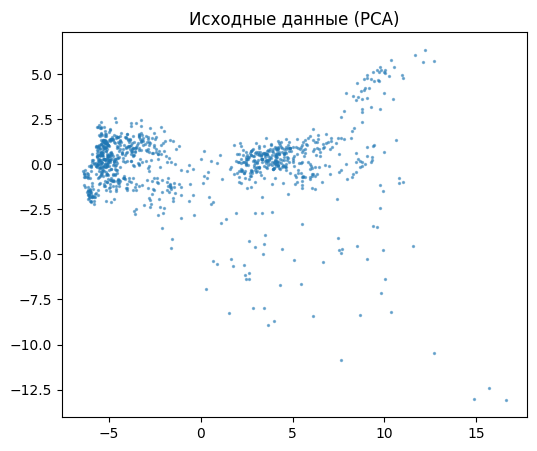

In [ ]:
pca = PCA(n_components=2)
X_vis = pca.fit_transform(X)
plt.figure(figsize=(6, 5))
plt.scatter(X_vis[:, 0], X_vis[:, 1], s=2, alpha=0.5)
plt.title('Исходные данные (PCA)')
plt.show()

In [ ]:
def optimize_hyperparams(X, param_range, create_model_fn, score_fn, maximize=True):
    best_score = float('-inf') if maximize else float('inf')
    best_param = None
    best_labels = None
    param_list = []
    score_list = []

    for param_val in param_range:
        model = create_model_fn(param_val)
        labels = model.fit_predict(X)

        if len(np.unique(labels)) > 1:
            metric_val = score_fn(X, labels, model)
            is_better = (metric_val > best_score) if maximize else (metric_val < best_score)
            if is_better:
                best_score = metric_val
                best_param = param_val
                best_labels = labels
            param_list.append(param_val)
            score_list.append(metric_val)

    return best_param, best_score, best_labels, param_list, score_list

In [ ]:
def plot_results(X_vis, labels, title, n_clusters):
    plt.figure(figsize=(6, 5))
    plt.scatter(X_vis[:, 0], X_vis[:, 1], s=2, c=labels)
    plt.title(f"{title}, кластеров – {n_clusters}")
    plt.show()

def plot_metric_curve(param_list, score_list, method_name, param_name, metric_name):
    plt.figure(figsize=(6, 4))
    plt.plot(param_list, score_list, marker='o')
    plt.title(method_name)
    plt.xlabel(param_name)
    plt.ylabel(metric_name)
    plt.grid(True, alpha=0.3)
    plt.show()


=== KMeans + Silhouette ===
Лучший k = 2, Silhouette = 0.36570323657693393


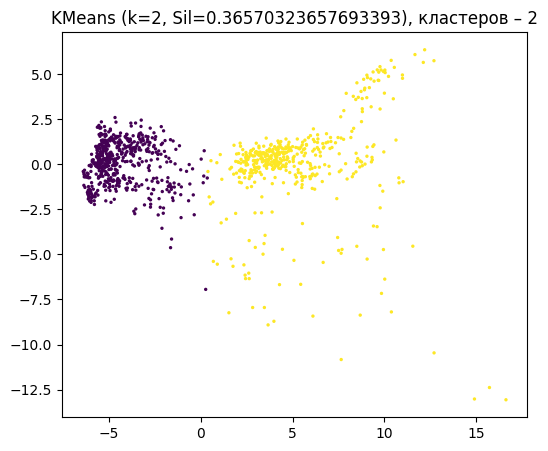

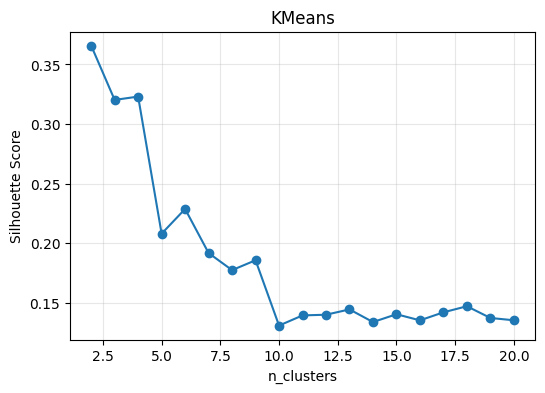

In [ ]:
print('\n=== KMeans + Silhouette ===')
best_k, best_sil, best_km_labels, k_list, sil_list = optimize_hyperparams(
    X,
    range(2, 21),
    lambda k: KMeans(n_clusters=k, n_init=10, random_state=42),
    lambda X, labels, model: silhouette_score(X, labels),
    maximize=True
)

n_km_clusters = len(np.unique(best_km_labels))
print(f'Лучший k = {best_k}, Silhouette = {best_sil}')
plot_results(X_vis, best_km_labels, f'KMeans (k={best_k}, Sil={best_sil})', n_km_clusters)
plot_metric_curve(k_list, sil_list, 'KMeans', 'n_clusters', 'Silhouette Score')


=== AgglomerativeClustering + Davies-Bouldin ===
Лучший n_clusters = 2, Davies-Bouldin = 1.1454927781118118


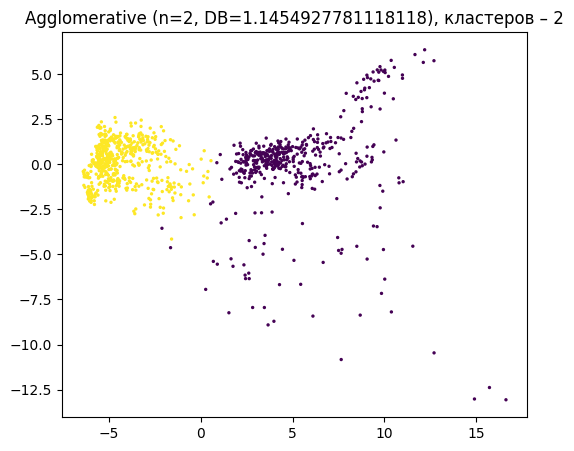

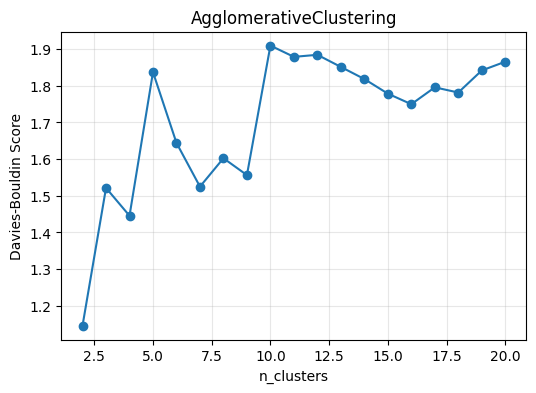

In [ ]:
print('\n=== AgglomerativeClustering + Davies-Bouldin ===')
best_n_agg, best_db, best_agg_labels, n_agg_list, db_list = optimize_hyperparams(
    X,
    range(2, 21),
    lambda n: AgglomerativeClustering(n_clusters=n),
    lambda X, labels, model: davies_bouldin_score(X, labels),
    maximize=False
)

n_agg_clusters = len(np.unique(best_agg_labels))
print(f'Лучший n_clusters = {best_n_agg}, Davies-Bouldin = {best_db}')
plot_results(X_vis, best_agg_labels, f'Agglomerative (n={best_n_agg}, DB={best_db})', n_agg_clusters)
plot_metric_curve(n_agg_list, db_list, 'AgglomerativeClustering', 'n_clusters', 'Davies-Bouldin Score')


=== GaussianMixture + BIC ===
Лучший n_components = 2, BIC = -1397666.760160599


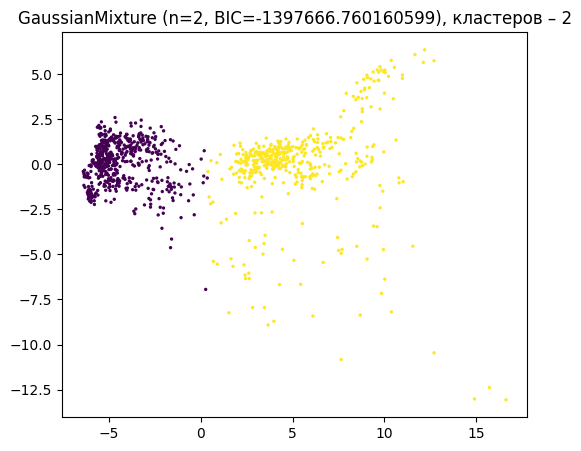

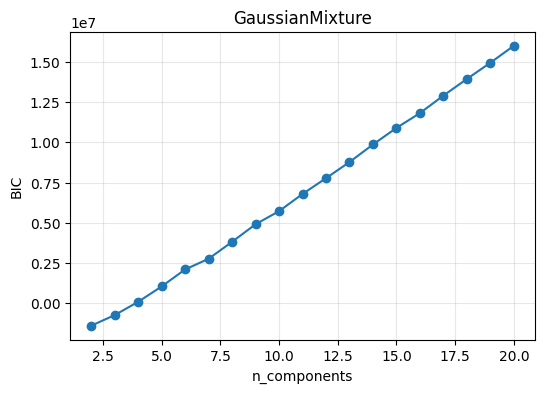

In [ ]:
print('\n=== GaussianMixture + BIC ===')
best_n_gmm, best_bic, best_gmm_labels, n_gmm_list, bic_list = optimize_hyperparams(
    X,
    range(1, 21),
    lambda n: GaussianMixture(n_components=n, random_state=42),
    lambda X, labels, model: model.bic(X),
    maximize=False
)

n_gmm_clusters = len(np.unique(best_gmm_labels))
print(f'Лучший n_components = {best_n_gmm}, BIC = {best_bic}')
plot_results(X_vis, best_gmm_labels, f'GaussianMixture (n={best_n_gmm}, BIC={best_bic})', n_gmm_clusters)
plot_metric_curve(n_gmm_list, bic_list, 'GaussianMixture', 'n_components', 'BIC')


=== DBSCAN + Calinski-Harabasz ===
Лучший eps = 5.689655172413794, Calinski-Harabasz = 73.77885223452773


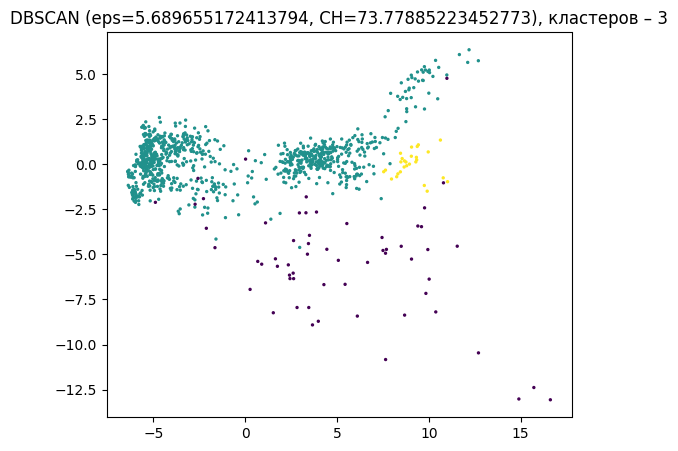

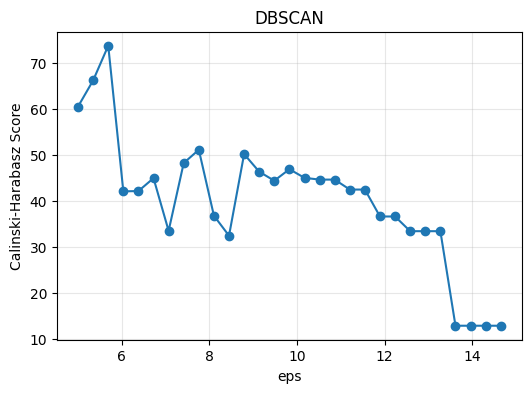

In [ ]:
print('\n=== DBSCAN + Calinski-Harabasz ===')
best_eps, best_ch, best_db_labels, eps_list, ch_list = optimize_hyperparams(
    X,
    np.linspace(5, 15, 30),
    lambda e: DBSCAN(eps=e, min_samples=5),
    lambda X, labels, model: calinski_harabasz_score(X, labels) if len(np.unique(labels)) > 1 else -np.inf,
    maximize=True
)

n_db_clusters = len(np.unique(best_db_labels))
print(f'Лучший eps = {best_eps}, Calinski-Harabasz = {best_ch}')
plot_results(X_vis, best_db_labels, f'DBSCAN (eps={best_eps}, CH={best_ch})', n_db_clusters)
plot_metric_curve(eps_list, ch_list, 'DBSCAN', 'eps', 'Calinski-Harabasz Score')

In [ ]:
print('ИТОГ')
results = [
    ('KMeans', n_km_clusters, f'Silhouette={best_sil}', f'k={best_k}'),
    ('Agglomerative', n_agg_clusters, f'Davies-Bouldin={best_db}', f'n={best_n_agg}'),
    ('GaussianMixture', n_gmm_clusters, f'BIC={best_bic}', f'n={best_n_gmm}'),
    ('DBSCAN', n_db_clusters, f'CH={best_ch}', f'eps={best_eps}')
]

for method, n_clust, metric, params in results:
    print(f'{method} | Кластеров: {n_clust} | Метрика: {metric} | Параметры: {params}')

ИТОГ
KMeans | Кластеров: 2 | Метрика: Silhouette=0.36570323657693393 | Параметры: k=2
Agglomerative | Кластеров: 2 | Метрика: Davies-Bouldin=1.1454927781118118 | Параметры: n=2
GaussianMixture | Кластеров: 2 | Метрика: BIC=-1397666.760160599 | Параметры: n=2
DBSCAN | Кластеров: 3 | Метрика: CH=73.77885223452773 | Параметры: eps=5.689655172413794
